## Decision Tree Algorithm

Decision trees are a type of supervised learning algorithm that can be used for both classification and regression. They work by splitting the data into subsets based on the features. The goal is to split the data in a way that minimizes the entropy of the subsets.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Load anscombe's quartet
x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]
anscombe = (pd.DataFrame({'x': x, 'y1': y1, 'y2': y2, 'y3': y3, 'x4': x4, 'y4': y4})
            )

anscombe

,x,y1,y2,y3,x4,y4
0,10,8.04,9.14,7.46,8,6.58
1,8,6.95,8.14,6.77,8,5.76
2,13,7.58,8.74,12.74,8,7.71
3,9,8.81,8.77,7.11,8,8.84
4,11,8.33,9.26,7.81,8,8.47
5,14,9.96,8.10,8.84,8,7.04
6,6,7.24,6.13,6.08,8,5.25
7,4,4.26,3.10,5.39,19,12.50
8,12,10.84,9.13,8.15,8,5.56
9,7,4.82,7.26,6.42,8,7.91


In [19]:
## Create "decision stump"
## fit tree regressor to anscombe's quartet limit to 1 level

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=1)
X = anscombe[['x']]
y = anscombe['y1']
dt.fit(X, y)


DecisionTreeRegressor(max_depth=1)

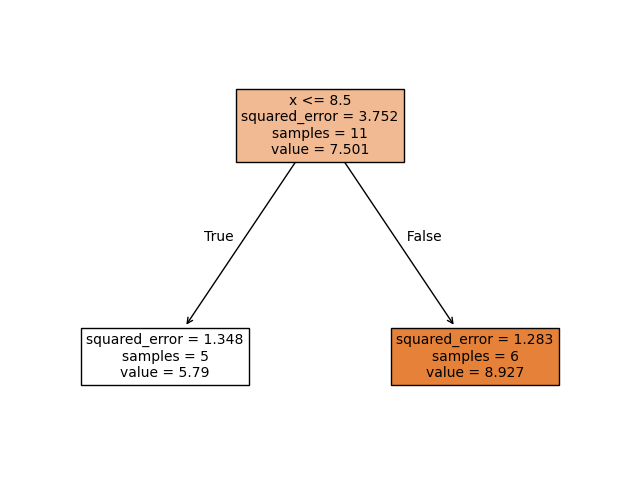

In [20]:
## Plot the tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(8, 6))
_ = plot_tree(dt, ax=ax, feature_names=['x'], filled=True, fontsize=10)

/home/tsr/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


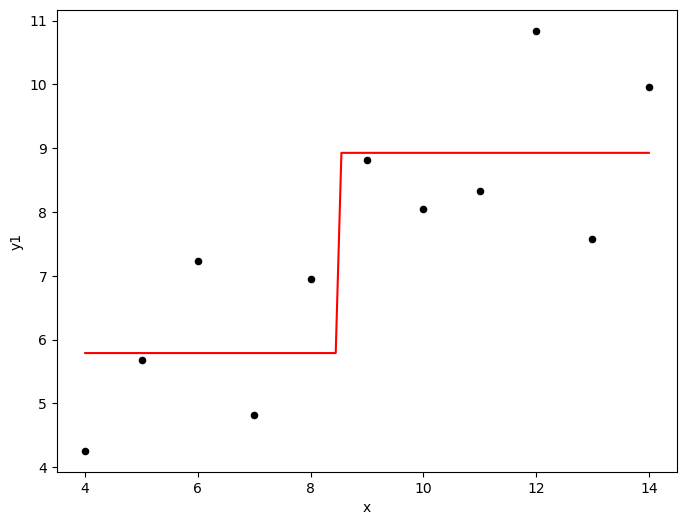

In [21]:
## Plot the data and predictions on the same plot
import numpy as np
fig, ax = plt.subplots(figsize=(8, 6))
anscombe.plot.scatter(x='x', y='y1', ax=ax, color='k')
# plot the line
x1 = np.linspace(4, 14, 100)
y1 = dt.predict(x1.reshape(-1, 1))
ax.plot(x1, y1, color='r')


/home/tsr/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


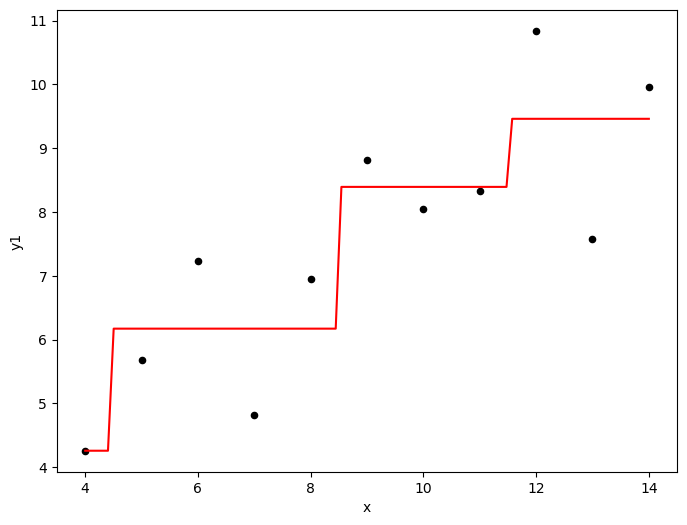

In [22]:
## Now plot to two levels
fig, ax = plt.subplots(figsize=(8, 6))
anscombe.plot.scatter(x='x', y='y1', ax=ax, color='k')
# plot the line
dt2 = DecisionTreeRegressor(max_depth=2)
dt2.fit(X, y)

x1 = np.linspace(4, 14, 100)
y1 = dt2.predict(x1.reshape(-1, 1))
ax.plot(x1, y1, color='r')


/home/tsr/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


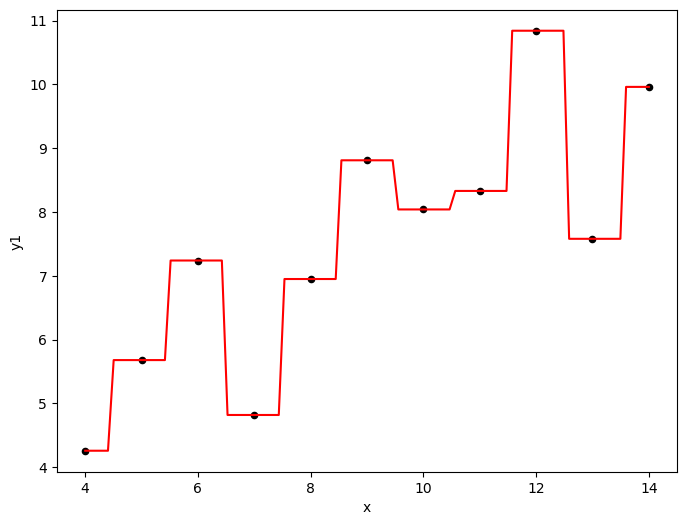

In [23]:
## Now plot unlimited levels
fig, ax = plt.subplots(figsize=(8, 6))
anscombe.plot.scatter(x='x', y='y1', ax=ax, color='k')
# plot the line
dt3 = DecisionTreeRegressor(max_depth=None)
dt3.fit(X, y)

x1 = np.linspace(4, 14, 100)
y1 = dt3.predict(x1.reshape(-1, 1))
ax.plot(x1, y1, color='r')


## Real World with Aircraft Elevators

In [24]:
# https://www.openml.org/search?type=data&sort=runs&id=216&satatus=active 
from datasets import load_dataset
elevators = load_dataset('inria-soda/tabular-benchmark', data_files='reg_num/elevators.csv')

In [25]:
elev = elevators['train'].to_pandas()
elev

,climbRate,Sgz,p,q,curRoll,absRoll,diffClb,diffRollRate,diffDiffClb,SaTime1,SaTime2,SaTime3,SaTime4,diffSaTime1,diffSaTime3,Sa,Goal
0,118.0,-55.0,-0.28,-0.08,-0.2,-11.0,11.0,0.005,-0.2,-0.0010,-0.0010,-0.0010,-0.0010,0.0000,0.0,-0.0010,0.031
1,390.0,-45.0,-0.06,-0.07,-0.6,-12.0,11.0,0.010,-0.2,-0.0008,-0.0008,-0.0008,-0.0008,0.0000,0.0,-0.0008,0.034
2,68.0,6.0,0.11,0.15,0.6,-10.0,-9.0,-0.003,-0.2,-0.0011,-0.0010,-0.0010,-0.0010,-0.0002,0.0,-0.0010,0.033
3,-358.0,-12.0,-0.20,0.13,-0.3,-11.0,-7.0,0.001,-0.1,-0.0010,-0.0010,-0.0010,-0.0010,0.0000,0.0,-0.0010,0.032
4,-411.0,-19.0,-0.18,0.02,-0.5,-11.0,-3.0,0.002,1.2,-0.0010,-0.0010,-0.0010,-0.0010,0.0000,0.0,-0.0010,0.030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16594,299.0,-28.0,0.08,-0.12,-0.3,-9.0,15.0,0.010,-0.2,-0.0005,-0.0005,-0.0005,-0.0005,0.0000,0.0,-0.0005,0.027
16595,84.0,0.0,0.14,0.14,1.1,-8.0,-11.0,-0.014,-0.6,-0.0009,-0.0009,-0.0009,-0.0009,0.0000,0.0,-0.0009,0.026
16596,-208.0,-6.0,-0.48,0.09,0.2,-9.0,-7.0,-0.010,-0.1,-0.0009,-0.0009,-0.0009,-0.0009,0.0000,0.0,-0.0009,0.023
16597,-146.0,-14.0,-0.38,-0.03,-0.8,-10.0,10.0,0.010,-1.0,-0.0005,-0.0005,-0.0005,-0.0005,0.0000,0.0,-0.0005,0.022


In [26]:
X_elev = elev.drop(columns=['Goal'])
y_elev = elev['Goal']
dt_elev = DecisionTreeRegressor(max_depth=3)
dt_elev.fit(X_elev, y_elev)


DecisionTreeRegressor(max_depth=3)

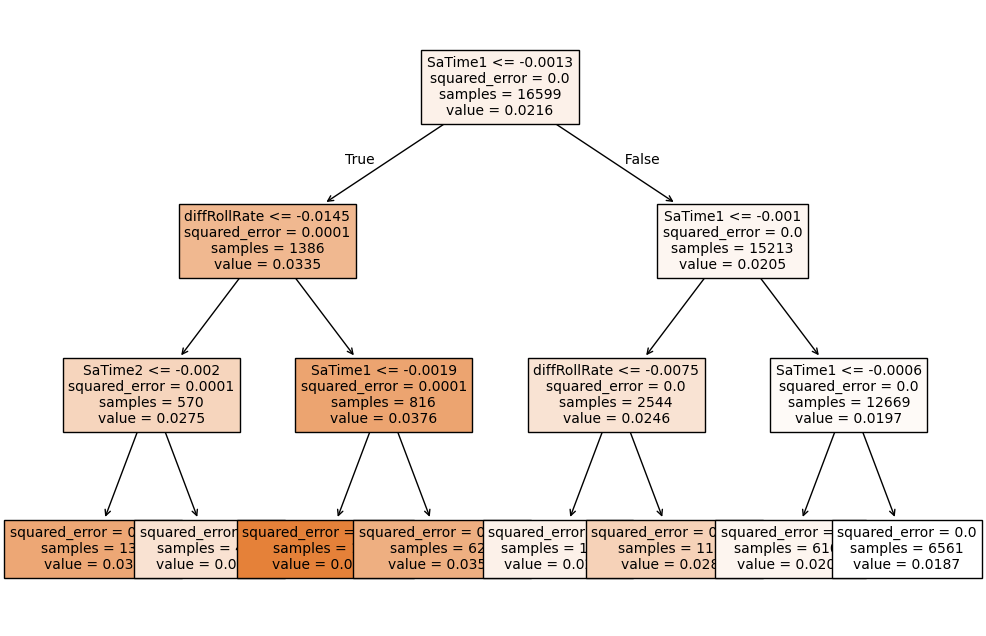

In [27]:
# plot the tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 8))
_ = plot_tree(dt_elev, ax=ax, feature_names=X_elev.columns, filled=True, fontsize=10, precision=4)


In [28]:
dt_elev.score(X_elev, y_elev)

0.48738100110114524

In [29]:
from sklearn.linear_model import LinearRegression
lr_elev = LinearRegression()
lr_elev.fit(X_elev, y_elev)
lr_elev.score(X_elev, y_elev)

0.8134729462382582

<Axes: >

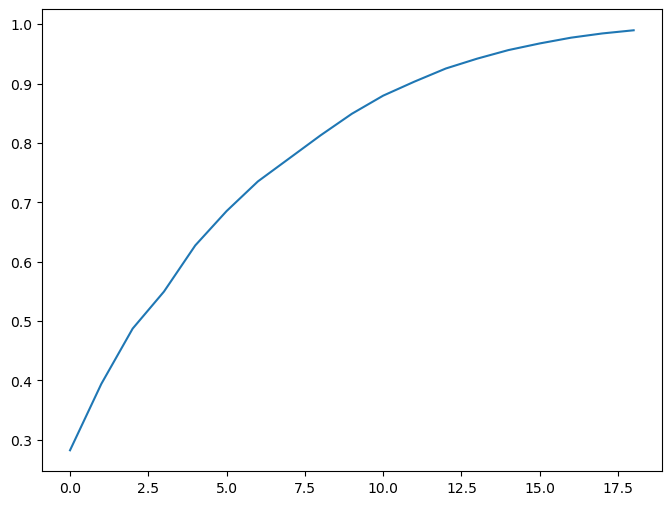

In [30]:
# loop over depths and plot the results
scores = []
for i in range(1, 20):
    dt = DecisionTreeRegressor(max_depth=i)
    dt.fit(X_elev, y_elev)
    scores.append(dt.score(X_elev, y_elev))

pd.Series(scores).plot.line(figsize=(8, 6))

Text(0.5, 1.0, 'Validation Curve for Decision Tree')

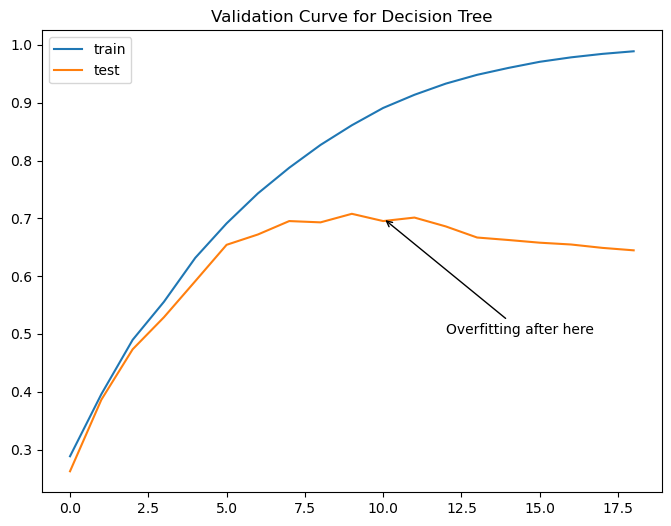

In [31]:
# split the data and plot results of train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_elev, y_elev, random_state=42)
test_scores = []
train_scores = []
for i in range(1, 20):
    dt = DecisionTreeRegressor(max_depth=i)
    dt.fit(X_train, y_train)
    test_scores.append(dt.score(X_test, y_test))
    train_scores.append(dt.score(X_train, y_train))

ax = pd.DataFrame({'train': train_scores, 'test': test_scores}).plot.line(figsize=(8, 6))

# annotate overfitting at 10, .7
ax.annotate('Overfitting after here', xy=(10, .7), xytext=(12, .5), arrowprops={'arrowstyle': '->'})

# set title
ax.set_title('Validation Curve for Decision Tree')


In [32]:
# Let's see if our model improves with a deeper tree
dt_elev = DecisionTreeRegressor(max_depth=11)
dt_elev.fit(X_train, y_train)
dt_elev.score(X_test, y_test)

0.7069078460402349

In [34]:
lr_elev = LinearRegression()
lr_elev.fit(X_train, y_train)
lr_elev.score(X_test, y_test)

0.8174575653756876

## Random Forests and XGBoost

In [35]:
# create a random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth=3)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)


0.5243033675120985

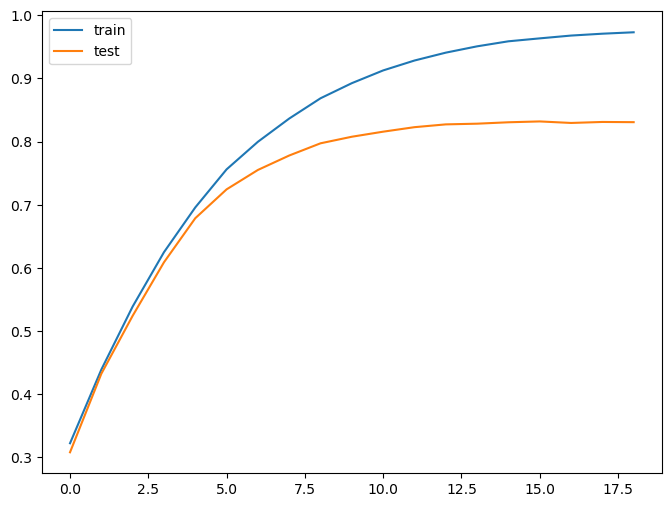

In [36]:
# sweep over depths and plot results
test_scores = []
train_scores = []
for i in range(1, 20):
    rf = RandomForestRegressor(n_estimators=100, max_depth=i)
    rf.fit(X_train, y_train)
    test_scores.append(rf.score(X_test, y_test))
    train_scores.append(rf.score(X_train, y_train))

ax = pd.DataFrame({'train': train_scores, 'test': test_scores}).plot.line(figsize=(8, 6))

In [37]:
# create a random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth=13, random_state=42)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)


0.8270018326681252

In [38]:
# create an xgb regressor
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)

0.8764783616363858